In [1]:
from IPython.display import display, HTML

display(
    HTML(
        """<style>
* {font-family:D2Coding;}
div.container{width:87% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input { font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:3px;}
table.dataframe{font-size:12px;}
</style>
"""
    )
)

<font size="5" color="red"><b>ch4. 머신러닝 모형 최적화</b></font> 
# 1절. 변수 선택과 차원 축소
## 1-1 변수선택과 차원축소
- 종속변수에 영향을 주는 변수들을 찾아 학습에 사용할 독립변수의 수를 줄임 
   (어떻게 하면 score를 높일 수 있을지?)
- 과적합과 변수들 사이의 다중공선성(변수들간 강한 상관관계)을 줄일 수 있음 
    * 회귀계수 해석이 어려워짐. 모델 예측력이 좋아도 해석력이 떨어짐(어떤 변수가 제일 큰 요인인지 잘), p값이 
나 유의성 검정이 왜곡될 수 있음
- 모형의 학습 시간을 줄일 수 있음
- 주성분분석, 상관분석, **분류모형의 feature_importance_, 예측 모형의 coef_**
- SelectKBest : 가장 높은 score에 따라 K개의 특징을 선택
## 1-2 주성분분석(PCA, Principal Component Anaysis)
- 주성분분석은 변수 선택 및 차원축소 방법(기존의 모든 변수를 조합하여 새로운 변수로 만듦) 으로 널리 사용
- 주성분 분석은 상관관계가 있는 변수들을 선형결합해서 **분산이 극대화된 상관관계가 없는 새로운 변수(주성분) 
들로 축약**하는 것
- 주성분 분석은 사실 선형대수학이라기보다는 선형대수학의 활용적인 측면이 강하며 영상인식, 통계 데이터분석 
(주성분 찾기), 데이터 압축, 노이즈제거 등 여러 분야에 사용
- 영상처리에서 많이 활용 : 여러개의 영상 중 대표 이미지를 찾을 때 활용

In [2]:
import seaborn as sns
from sklearn.decomposition import PCA

iris = sns.load_dataset('iris')
# iris.head()

iris_X , iris_y = iris.iloc[:, :-1], iris.species
iris_X.head()


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
pca = PCA(n_components=2)  # conponents=2 : 주성분의 갯수
pca.fit(iris_X)
iris_pca = pca.transform(iris_X)
iris_pca[:5]


array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

In [4]:
# 각 주성분의 계수 : 각 주성분이 원래 특성들과 어떤 관계가 있는지 나타내는 가중치
pca.components_ 
# 주성분 1 = 0.36138659*sl + -0.08452251*sw + 0.85667061 * pl +  0.3582892 * pw
#        = 0.36138659*x1 + -0.08452251*x2 + 0.85667061 * x3 +  0.3582892 * x4

# 주성분 2 = -0.65658877*sl + -0.72971237*sw + 0.17722871 * pl +  0.07470647 * pw
#        = -0.65658877*x1 + -0.72971237*x2 + 0.17722871 * x3 +  0.07470647 * x4

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [5]:
# 설명분산 : 각 주성분 벡터가 정보량을 얼마나 잘 표현하는지 (설명하는지)
pca.explained_variance_

array([4.22824171, 0.24267075])

In [6]:
# 설명분산을 0 ~ 1 사이의 비율로 조정된 설명 정도 : 주성분 결과 특성은 97.76852 %
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

## 1-3. 상관관계 확인

- 각 변수들끼리 상관관계 확인 (시작화), 종속변수와 상관광계가 높은 변수들만 선택

In [7]:
import pandas as pd
# redwine = pd.read_csv('./data/winequality-red.csv', delimiter=';') # delimiter == sep
redwine = pd.read_csv('./data/winequality-red.csv', sep=';')
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
# 상관관계 확인 corr()
corr = redwine.corr()
# corr

# 상관관계 결과를 시각화 (heatmap)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# cmap의 종류 : https://jrc-park.tistory.com/155 
# http://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap 
# http://seaborn.pydata.org/examples/many_pairwise_correlations.html 

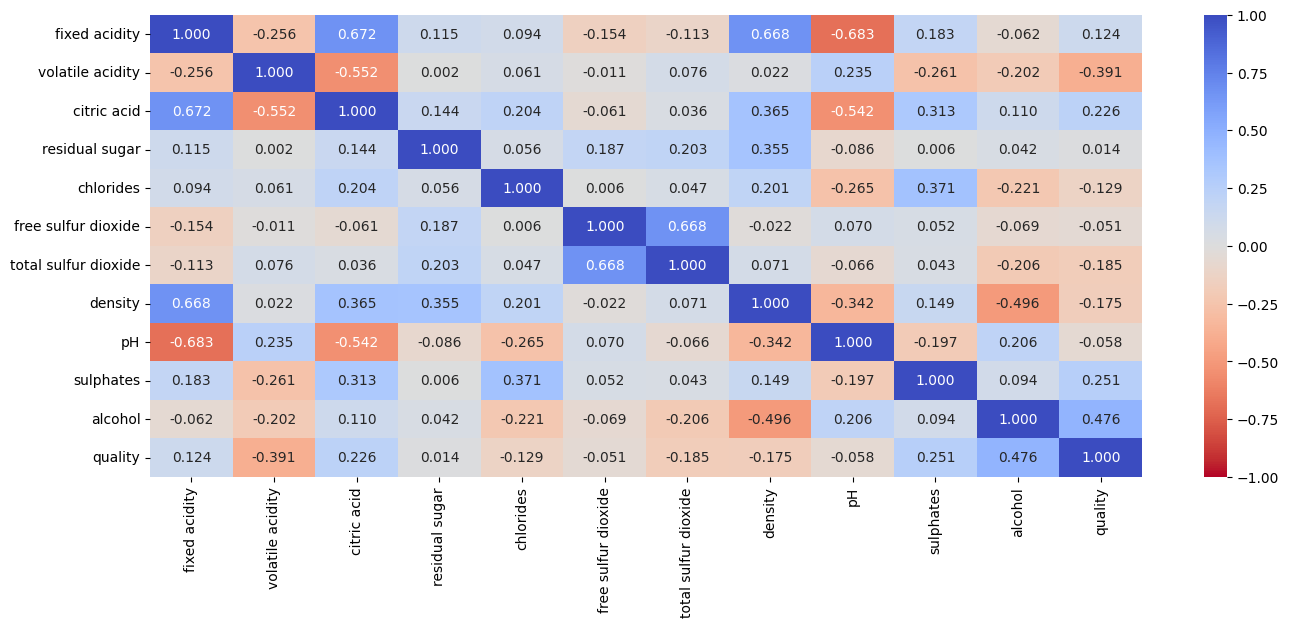

In [9]:
plt.figure(figsize=(16, 6))
sns.heatmap(corr, annot=True, fmt='.3f', vmin=-1, vmax=1, cmap='coolwarm_r')
plt.show()

In [10]:
np.triu(np.ones_like(corr), k=0)  # 대각선 포함 위가 1인 상각행렬
np.triu(np.ones_like(corr), k=1)  # 대각선 제외 위가 1인 상각행렬
np.tril(np.ones_like(corr), k=0)  # 대각선 포함 아래가 1인 하각행렬
np.tril(np.ones_like(corr), k=-1)  # 대각선 제외 아래가 1인 하각행렬

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.]])

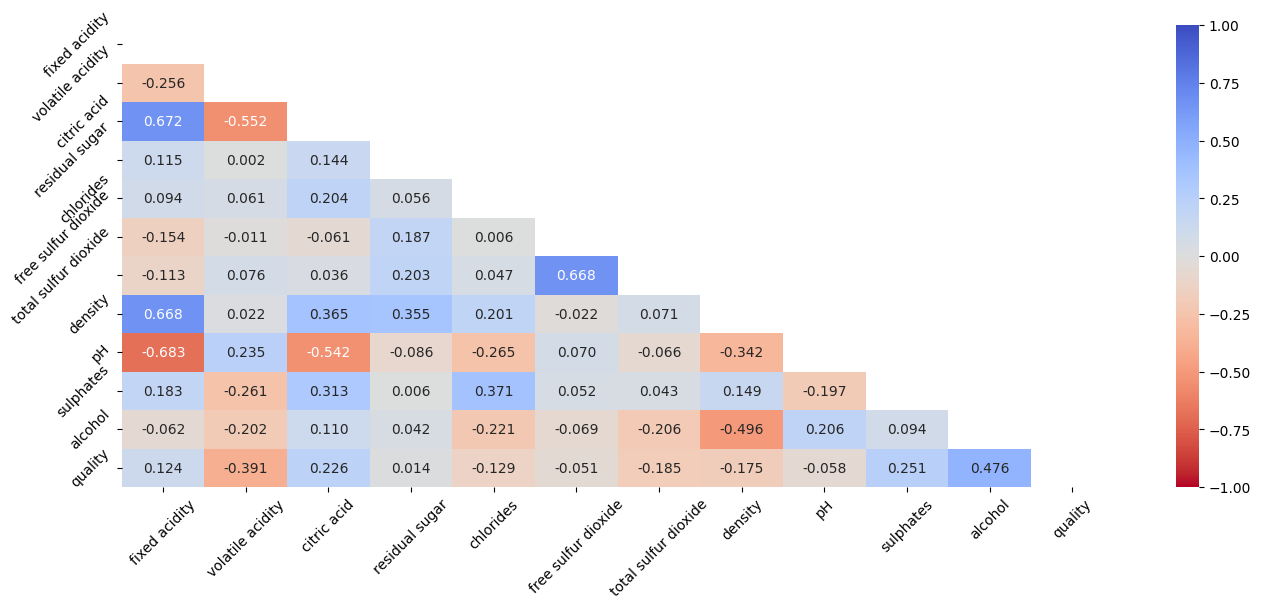

In [11]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(corr, dtype=bool), k=0)  # 대각선 포함 위가 1인 상각행렬
sns.heatmap(corr, annot=True, fmt='.3f', vmin=-1, vmax=1, cmap='coolwarm_r', mask=mask)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

## 1.4. 분류모형의 feature_importance

- 분류모형의 feature_importance 속성은 각 독립변수들의 종속변수에 영향을 주는 정도
- logisticRegression 이나, SVC, MLP, GaussianNB 은 feature_importance가 없음
- 그 외 분류모형은 사용 가능

In [12]:
from sklearn.model_selection import train_test_split

X = redwine.iloc[:, :-1]
# y = redwine.quality
y = redwine.iloc[:, -1]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

train_X.shape, test_X.shape, train_y.shape, test_y.shape



((1119, 11), (480, 11), (1119,), (480,))

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    # 랜덤포레스트 모델 생성
    n_estimators=10,  # 트리의 갯수
    # criterion='gini', # 불순도 측정 기준 
    random_state=10
)

rf_model.fit(train_X, train_y)

RandomForestClassifier(n_estimators=10, random_state=10)

In [14]:

features = pd.DataFrame(data = np.c_[X.columns, rf_model.feature_importances_], columns=['feature','importance'])
features['importance'].sum()

1.0

In [15]:
features.sort_values(by='importance', ascending=False, inplace=True)


In [16]:
features.reset_index(drop=True,inplace=True)

In [17]:
features.head()

,feature,importance
0,alcohol,0.173849
1,total sulfur dioxide,0.103551
2,sulphates,0.096815
3,density,0.093684
4,volatile acidity,0.092711


### feature_importance 를 이용한 변수 중요도 시각화

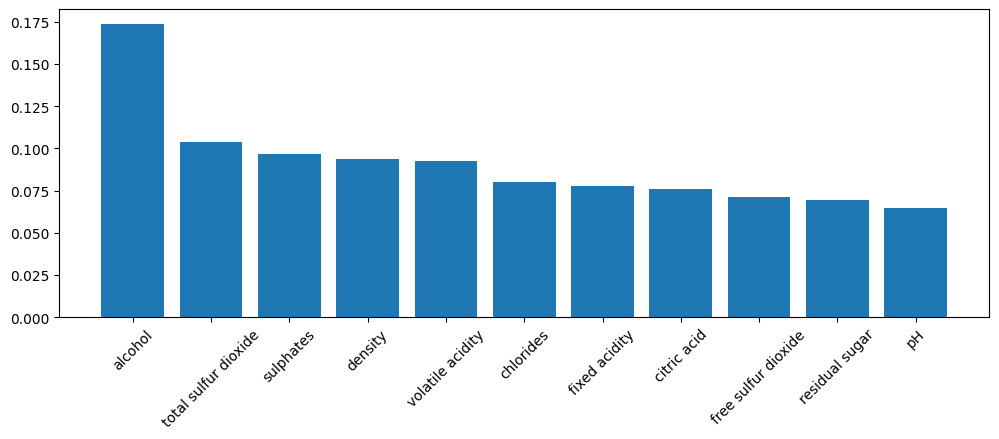

In [18]:
plt.figure(figsize=(12, 4))
plt.bar(features.feature, features.importance)
plt.xticks(rotation=45, fontsize=10)
plt.show()

In [19]:
# features.importance 누적합
# l = [1,2,3]
# np.cumsum(l)
y_stack = np.cumsum(features.importance)
np.c_[features.importance, y_stack]


array([[0.17384886609780478, 0.17384886609780478],
       [0.10355099498168249, 0.2773998610794873],
       [0.09681531815141449, 0.37421517923090175],
       [0.09368400284742992, 0.4678991820783317],
       [0.09271102902509569, 0.5606102111034273],
       [0.08038832073384408, 0.6409985318372714],
       [0.07769441276994367, 0.7186929446072151],
       [0.07600026155051146, 0.7946932061577265],
       [0.07124219361573089, 0.8659353997734575],
       [0.06960529242877662, 0.9355406922022341],
       [0.06445930779776589, 1.0]], dtype=object)

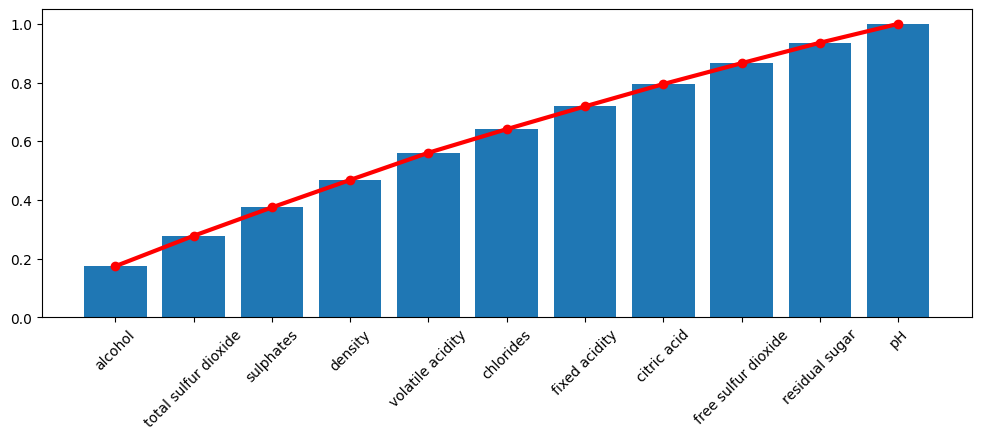

In [20]:
# 누적합을 이용하여, 시각화
plt.figure(figsize=(12, 4))
plt.bar(features.feature, y_stack)
plt.plot(features.feature, y_stack, color="red", lw=3, marker="o")
plt.xticks(rotation=45, fontsize=10)
plt.show()

### RFE (Recursive Feature Ellmination) 방식

- RFE 클래스를 이용 : 중요도에 따라 중요도가 낮은 변수부터 하나씩 제거해 가면서, 최종 선택한 변수 개수만큼 중요도가 높은 변수를 찾는다.

In [21]:
# 5개 특징이 남을 때까지 변수를 제거 (기준 : feature_importance)
# train_X
from sklearn.feature_selection import RFE

rfe = RFE(rf_model, n_features_to_select=5)
rfe.fit(train_X, train_y)

print(rfe.support_) # 선택여부 : True, False


[False  True False False False False  True  True False  True  True]


In [22]:
features_rfe = pd.DataFrame(np.c_[X.columns, rfe.get_support()], columns=['feature', 'selected'])
features_rfe[features_rfe.selected==True]

,feature,selected
1,volatile acidity,True
6,total sulfur dioxide,True
7,density,True
9,sulphates,True
10,alcohol,True


## 1-5. SelectKBest

- 가장 높은 score에 따라 k개 feature 선택

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

X.shape, y.shape, type(X), type(y)


((150, 4), (150,), numpy.ndarray, numpy.ndarray)

In [24]:
features_names = iris.columns[:-1].tolist()
features_names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [25]:
# 가장 중요한 feature 1개 추출
# f_classif : y는 범주형, X는 연속형
# ch12 : y는 범주형, x는 범주형, 양의 실수
# mutual_info : 비선형 데이터 고려...

X_new = SelectKBest(
    # X가 연속형
    f_classif, 
    # 추출될 feature 갯수
    k=1
).fit_transform(X, y)    
# print(iris)
X_new[:3] # petal_length



array([[1.4],
       [1.4],
       [1.3]])

# 2절. 파라미터 선택

- 하이퍼파라미터 (사용자가 직접 설정할 수 있는 파라미터), 최적의 결과를 내는 하이퍼파라미터 값?)
  1. validation_curve() : 단일 하이퍼파라미터 최적화 함수
  2. GridSearchCV() : 복수 하이퍼파라미터 최족화 클래스 (가장 높은 score를 내는 모형까지 찾아줌)


## 2-1. validation_curve()
- param_name, param_range(리스트), scoring(성능기준지표[accuracy, recall, 등등]) 매개변수로 받아 최족의 성능 개선


In [26]:
# 데이터 
from sklearn.datasets import load_digits
digits = load_digits()
# digits.data.shape : (1979, 64) 배열 (독립변수)
# digits.images.shape (1797, 8, 8) 배열
# digits.target : 1797 열 배열 (타켓변수)
# digits.target_names : 타켓변수 내용

X, y = digits.data, digits.target
X.shape, y.shape


((1797, 64), (1797,))

In [27]:
X[0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [28]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [29]:
np.all(X[0].reshape(8, 8) == digits.images[0])

True

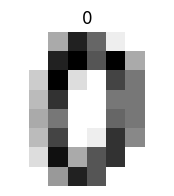

In [30]:
plt.figure(figsize=(2, 2))
plt.imshow(X[0].reshape(8, 8), cmap='gray_r')
plt.title(y[0])
plt.axis('off')
plt.show()

In [31]:
from sklearn.svm import SVC
model = SVC(probability=True) # probability=True 판별모형이라도 proba 가능

model.fit(X, y)


SVC(probability=True)

In [32]:

# 예측값
model.predict(X[0].reshape(1, -1))

array([0])

In [33]:
# 예측확률
print(model.classes_)
print(model.predict_proba(X[0].reshape(1, -1)))
print(model.predict(X[0].reshape(1, -1)))

[0 1 2 3 4 5 6 7 8 9]
[[9.91194332e-01 1.77671391e-04 4.91573708e-04 8.72756248e-04
  6.22746423e-04 1.34444664e-03 7.15221326e-04 9.35742314e-04
  7.41997156e-04 2.90351280e-03]]
[0]


In [34]:
for c, p in zip(model.classes_, model.predict_proba(X[0].reshape(1, -1))[0]):
    print("{} 일 확률 :{:.3f} ".format(c, p))

0 일 확률 :0.991 
1 일 확률 :0.000 
2 일 확률 :0.000 
3 일 확률 :0.001 
4 일 확률 :0.001 
5 일 확률 :0.001 
6 일 확률 :0.001 
7 일 확률 :0.001 
8 일 확률 :0.001 
9 일 확률 :0.003 


In [35]:
model.score(X, y)

0.996661101836394

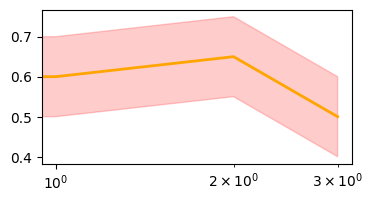

In [36]:
import matplotlib.pyplot as plt
import numpy as np

range = np.array([0, 1, 2, 3])
score = np.array([0.5, 0.6, 0.65, 0.5])

plt.figure(figsize=(4, 2))
plt.semilogx(range, score, color='orange', lw=2)
plt.fill_between(range, score-0.1, score+0.1, color='red', alpha=0.2)

In [37]:
# SVC() : 모형에서 c 파라미터 값을 다음의 범위중 제일 좋은 c값
# 10의 -6승 부터 10의 -1승 까지 10개의 값을 생성 (로그간격으로 균등분포 10개를 추출)
param_range = np.logspace(-6, -1, 10)
param_range

array([1.00000000e-06, 3.59381366e-06, 1.29154967e-05, 4.64158883e-05,
       1.66810054e-04, 5.99484250e-04, 2.15443469e-03, 7.74263683e-03,
       2.78255940e-02, 1.00000000e-01])

In [38]:
%%time
from sklearn.model_selection import validation_curve

train_score, test_score = validation_curve(
    SVC(), # 예측모형
    X, y, # 독립변수, 타겟변수
    param_name='gamma', # 파라미터 이름
    param_range=param_range, # list 로 파라미터 전달
    cv=10, # 교차검증 : 데이터 10개중 1개식 test 데이터로 검증하고 평균 score 계산
    scoring='accuracy', # 성능 측정 기준
    n_jobs=-1 # 시스템의 모든 core 사용 (병렬처리 갯수)
)

CPU times: user 204 ms, sys: 128 ms, total: 332 ms
Wall time: 7.81 s


In [39]:
train_score.shape, test_score.shape

((10, 10), (10, 10))

In [40]:
train_score_mean = np.mean(train_score, axis=1) # 행렬평균
test_score_mean= np.mean(test_score, axis=1)

train_score_std = np.std(train_score, axis=1)
test_score_std = np.std(test_score, axis=1)



In [41]:
train_score_mean,train_score_std

(array([0.13836306, 0.72045751, 0.93439655, 0.96939318, 0.98775736,
        0.99789765, 1.        , 1.        , 1.        , 1.        ]),
 array([0.06061766, 0.01032486, 0.00377997, 0.00261459, 0.00102754,
        0.00056702, 0.        , 0.        , 0.        , 0.        ]))

In [42]:
test_score_mean, test_score_std

(array([0.13871508, 0.70395717, 0.90871198, 0.94264742, 0.95880509,
        0.97495655, 0.97496586, 0.80522036, 0.19709497, 0.10463687]),
 array([0.06458693, 0.02805082, 0.03841992, 0.03207261, 0.02606765,
        0.02054497, 0.01863724, 0.05734476, 0.0509597 , 0.00764792]))

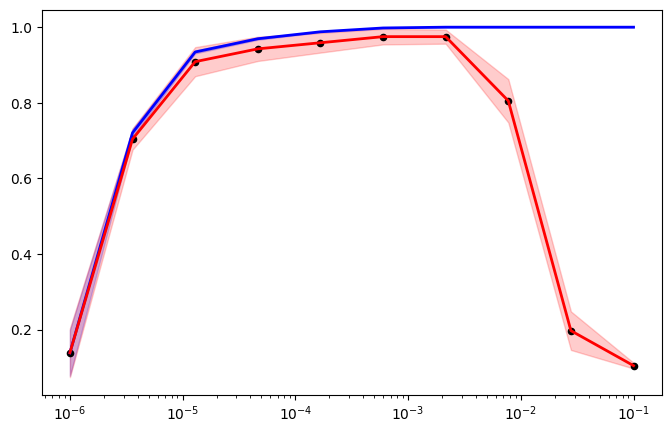

In [43]:
plt.figure(figsize=(8, 5))
plt.semilogx(param_range, train_score_mean, color='blue', lw=2)
plt.fill_between(param_range, train_score_mean-train_score_std, train_score_mean+train_score_std, color='blue', alpha=0.2)
plt.semilogx(param_range, test_score_mean, color='red', lw=2)
plt.fill_between(param_range, test_score_mean-test_score_std, test_score_mean+test_score_std, color='red', alpha=0.2)
plt.scatter(param_range, test_score_mean, color='k', s=20)
plt.show()

In [44]:
test_score_mean.argmax()

6

In [45]:
# 최적의 gammar 값
gammer = param_range[6]
gammer

0.0021544346900318843

In [46]:
model = SVC(gamma=gammer).fit(X, y)


In [47]:
model.score(X, y)

1.0

## 2-2. GridSearchCV

- 복수개의 하이퍼파라미터 최족화 클래스
- 모형도 가지고 옴
- 시간이 많이 걸린다는 단점
- fit(), score(), predict(), predict_proba(), decision_function()

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.svm import SVC

# 데이터
import pandas as pd
redwine = pd.read_csv('data/winequality-red.csv', sep=';')
display(redwine.head())

# 데이터 전처리
redwine.isnull().sum()


redwine_X, redwine_y = redwine.iloc[:, :-1], redwine.iloc[:, -1]
redwine_X.shape, redwine_y.shape

# 모델 생성
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# scaler.fit(redwine_X)

# redwine_X_scaled = scaler.transform(redwine_X)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


((1599, 11), (1599,))

In [49]:
%%time
# SelectKBest로 최적의 독립변수 k개 찾음 → SVC()에서 최적의 c 값 찾음

selection = SelectKBest(k=1) # 가장 평가 점수가 높은 k개를 찾음
svc = SVC(kernel='linear') # 직선으로 나누는 가장 단순한 분류모형 
pipeline = Pipeline(steps=[('select', selection), ('svc', svc)])
param_grid = dict(
    select__k = [4,5,6,7,8,9,10,11],
    svc__C = [0.1, 1, 10] # 오차 범위 허용 정도 (큰 C : 엄격, 작은 c : 허용범위 큼)
)

# param_grid
grid_search = GridSearchCV(
    pipeline, 
    param_grid=param_grid, # 파라미터들
    cv=2, # 교차검증 횟수
    verbose=2, # 로그 출력의 수다스러운 정도
    n_jobs=-1 # 병렬처리 갯수
)

grid_search.fit(redwine_X.values, redwine_y.values)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV] END ..............................select__k=4, svc__C=1; total time=   0.0s
[CV] END ............................select__k=4, svc__C=0.1; total time=   0.0s
[CV] END ..............................select__k=5, svc__C=1; total time=   0.0s
[CV] END ............................select__k=5, svc__C=0.1; total time=   0.0s
[CV] END ............................select__k=4, svc__C=0.1; total time=   0.1s
[CV] END .............................select__k=4, svc__C=10; total time=   0.1s
[CV] END ............................select__k=5, svc__C=0.1; total time=   0.1s
[CV] END .............................select__k=5, svc__C=10; total time=   0.1s
[CV] END ............................select__k=6, svc__C=0.1; total time=   0.1s
[CV] END ............................select__k=6, svc__C=0.1; total time=   0.2s
[CV] END ............................select__k=7, svc__C=0.1; total time=   0.1s
[CV] END ............................select__k=7

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('select', SelectKBest(k=1)),
                                       ('svc', SVC(kernel='linear'))]),
             n_jobs=-1,
             param_grid={'select__k': [4, 5, 6, 7, 8, 9, 10, 11],
                         'svc__C': [0.1, 1, 10]},
             verbose=2)

In [50]:
# 최적의 파라미터값
grid_search.best_params_

{'select__k': 9, 'svc__C': 1}

In [51]:
# 최적의 모형
model = grid_search.best_estimator_
model.score(redwine_X.values, redwine_y.values)

0.5872420262664165

In [52]:
model = SVC().fit(redwine_X.values, redwine_y.values)
model.score(redwine_X.values, redwine_y.values)

0.5103189493433395

# 3절. 자료 불균형 처리

- 단순 언더/오버 샘플링
- 단, 단순오버 샘플링시 소수의 데이터를 복사를 하면, 과적합 우려
- 오버 샘플링하는 방법 : SMOTE

## 3-1. SMOTE를 이용한 오버샘플링 전

In [53]:
# 데이터
from sklearn.datasets import make_classification
X, y = make_classification(
    n_samples=10000, # 데이터 갯수
    n_features=10, # 독립변수 갯수
    n_informative=5, # 타켓변수에 영향을 미치는 독립변수
    n_redundant=0, # 중복된 독립변수 갯수
    n_clusters_per_class=1,
    n_classes=2,
    weights=[0.99, 0.01], # 각 클래스에 할당된 표본
    random_state=42

)

y.mean()

0.014

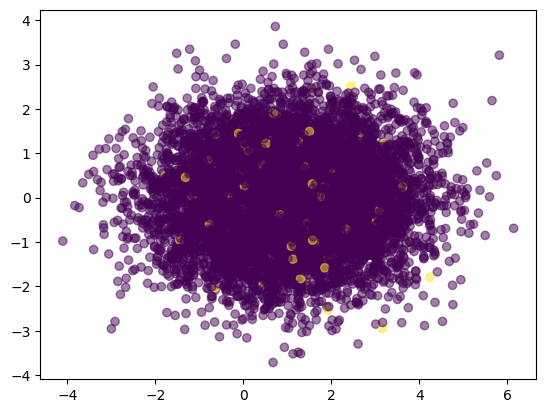

In [54]:
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [55]:
from matplotlib.pyplot import stackplot
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((7000, 10), (3000, 10), (7000,), (3000,))

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_features=2, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_features=2, random_state=42)

In [57]:
y_hat = rf_model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(y_test, y_hat)


array([[2958,    0],
       [  34,    8]])

In [58]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2958
           1       1.00      0.19      0.32        42

    accuracy                           0.99      3000
   macro avg       0.99      0.60      0.66      3000
weighted avg       0.99      0.99      0.98      3000



## 3-2. SMOTE를 이용한 전체 오버샘플리 후 데이터 셋 분리

- imbalanced-learn 라이브러리 install

In [59]:
# 0그룹과 1그룹의 갯수 확인
df = pd.DataFrame(np.c_[X, y])
df.iloc[:, -1].value_counts()

0.0    9860
1.0     140
Name: 10, dtype: int64

In [61]:
from imblearn.over_sampling import SMOTE

# sm = SMOTE() # 0그룹 : 1그룹 = 1 : 1 비율로 데이터 증강
sm = SMOTE(sampling_strategy={0: 9860, 1: 420})


X_resampled, y_resampled = sm.fit_resample(X, y)
X_resampled.shape, y_resampled.shape

/Users/teamkim/anaconda3/envs/ml-dl-nlp/lib/python3.10/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


((10280, 10), (10280,))

In [63]:
# 0그룹과 1그룹의 갯수 확인
df = pd.DataFrame(np.c_[X_resampled, y_resampled])
df.iloc[:, -1].value_counts()

0.0    9860
1.0     420
Name: 10, dtype: int64

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, 
                                                    y_resampled,
                                                   test_size=0.3,
                                                   stratify=y_resampled,
                                                   random_state=42)
rf_model = RandomForestClassifier(n_estimators=100,
                                 max_features=2,
                                 random_state=42)
rf_model.fit(X_train, y_train)
y_hat = rf_model.predict(X_test)
confusion_matrix(y_test, y_hat)



array([[2958,    0],
       [  55,   71]])

In [65]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2958
           1       1.00      0.56      0.72       126

    accuracy                           0.98      3084
   macro avg       0.99      0.78      0.86      3084
weighted avg       0.98      0.98      0.98      3084



## 3-3. 가중치 제어

- 자료 불균형 처리의 또 다른 방법
- sklearn의 예측 모형 중 class_weight 매개변수 설정

In [66]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_features=2,
    class_weight={0: 1, 1: 1.4},  # 1그룹을 1.4배 더 중요하게
    random_state=42,
)

rf_model.fit(X_train, y_train)

rf_model.score(X_test, y_test)

0.9818417639429312

# 4절. 앙상블 모형

- 목적 : 여러 분류모형을 하나의 메타 분류모델로 연결하여 개별 모형보다 더 좋은 일반화 성을 당성
- 방법 : 
  * 하나의 메타분류 알고리즘 이용 : 배깅 (bagging), 부스팅 (boosting)
  * 여러 분류 알고리즘을 이용 : 다수결 투표
- 배깅 vs 부스팅
  * 배깅
    - 복원추출로 데이터를 뽑아 병렬 학습 후 score가 높은 모델에 가중치 부여
    - 과적합을 줄일 수 있음
    - 데이터가 충분하고, 과적합을 방지하면서 안정적인 모델이 필요할 떄 
    - RandomForestClassifier, BagginClassifier
  * 부스팅
    - 순차적 모델 학습. 앞의 모델에서 틀린 데이터의 50%를 재학습
    - 오답에 가중치를 둠 (오답에 더 집중)
    - 성능 극대화
    - 성능을 극대화해야 하는데, 데이터가 비교적 적거나, 복잡한 패턴의 학습을 해야할 경우
    - LGBM, XGBoost

## 4-1. 배깅 알고리즘

In [88]:
wine_df = pd.read_csv('data/wine.csv')
wine_df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,0D280/0D315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [89]:
X = wine_df.iloc[:, 1:]
# y = wine_df.iloc[:, 0]
y = wine_df['Class label']

X.shape, y.shape


((178, 13), (178,))

In [90]:
y.value_counts()

2    71
1    59
3    48
Name: Class label, dtype: int64

In [91]:
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=1
)

train_X.shape, test_X.shape, train_y.shape, test_y.shape

((124, 13), (54, 13), (124,), (54,))

In [92]:
# 의사결정나무 알고리즘
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(
    criterion='entropy',
    random_state=1
)

tree_model.fit(train_X, train_y)
tree_model.score(test_X, test_y)

0.9074074074074074

In [93]:
# 배깅 알고리즘
from sklearn.ensemble import BaggingClassifier


bag_model = BaggingClassifier(
    estimator=tree_model, # 기본 모형
    n_estimators=500, # 모델 갯수
    bootstrap=True,  # 복원추출 허용
    bootstrap_features=False,  # 모든 feature 사용해서 학습
    random_state=1 # 랜덤 시드 고정
)

bag_model.fit(train_X, train_y)
bag_model.score(test_X, test_y)

0.9629629629629629

In [94]:
# 랜덤포레스트 알고리즘
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier().fit(train_X, train_y)

rf_model.score(test_X, test_y)

1.0

### 배깅 알고리즘시 : 0.632 규칙

In [95]:
np.random.choice(10, 10, replace=True) # 10개 데이터를 10개 복원추출 뽑기

array([2, 2, 9, 9, 9, 8, 5, 0, 9, 3])

In [96]:
len(set(np.random.choice(10000, 10000, replace=True)))

6335

In [97]:
N = 100
len(set(np.random.choice(N, N))) / N

0.65

## 4-2. 임의의 데이터를 

In [135]:
# X, y = make_classification(
#     n_samples=10000, # 데이터 갯수
#     n_features=10, # 독립변수 갯수
#     n_informative=5, # 타켓변수에 영향을 미치는 독립변수
#     n_redundant=0, # 중복된 독립변수 갯수
#     n_classes=2, # 클래스 갯수
#     n_clusters_per_class=1, # 각 클래스에 할당된 클러스터 갯수
#     weights=[0.9, 0.1], # 각 클래스에 할당된 표본 (0그웁인 90%, 1그룹 10%)
#     random_state=42 # 랜덤 시드 고정
# )

# X.shape, y.shape

X, y = make_classification(n_samples=1000,
                          n_features=10,
                          n_informative=5,
                          n_redundant=0,
                          n_classes=2,
                          n_clusters_per_class=1,
                          weights=[0.9, 0.1], # 0그룹인 90%, 1그룹10%
                          random_state=42)

In [136]:
# train_X, test_X, train_y, test_y = train_test_split(
#     X, y, test_size=0.3, stratify=y, random_state=42
# )

# sm = SMOTE()

# resampled_X, resampled_y = sm.fit_resample(train_X, train_y)

# resampled_X.shape, resampled_y.shape, test_X.shape, test_y.shape

train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                   test_size=0.3,
                                                   stratify=y, 
                                                   random_state=42)
sm = SMOTE()
resampled_X, resampled_y = sm.fit_resample(train_X, train_y)
resampled_X.shape, resampled_y.shape, test_X.shape, test_y.shape

/Users/teamkim/anaconda3/envs/ml-dl-nlp/lib/python3.10/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


((1246, 10), (1246,), (300, 10), (300,))

In [132]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# def model_measure(model, train_X=resampled_X, train_y=resampled_y, test_X=test_X, test_y=test_y):
#     '매개변수로 들어온 model 학습후 accuracy, precision, recall, f1score를 반환'
#     model.fit(train_X, train_y)
    
#     y_hat = model.predict(test_X) # 모델 예측값
#     accuracy= model.accuracy_score(test_X, test_y)
#     precision = model.precision_score(test_y, y_hat)
#     recall = model.recall_score(test_y, y_hat)
#     f1score = model.f1_score(test_y, y_hat)

#     return '정확도 : {:.3f}, 정밀도 : {:.3f}, 재현율 : {:.3f}, f1score : {:.3f}'.format(accuracy, precision, recall, f1score)

from sklearn.metrics import precision_score, recall_score, f1_score
def model_measure(model, train_X=resampled_X, train_y=resampled_y,
                 test_X=test_X, test_y=test_y):
    '매개변수로 들어온 model 학습후 accuracy, precision, recall, f1score를 반환'
    model.fit(train_X, train_y)
    y_hat = model.predict(test_X) # 모델 예측값
    accuracy = model.score(test_X, test_y)
    precision = precision_score(test_y, y_hat)
    recall    = recall_score(test_y, y_hat)
    f1score   = f1_score(test_y, y_hat)
    return "정확도:{:.3f}, 정밀도:{:.3f}, 재현율:{:.3f}, f1 :{:.3f}".format(
            accuracy, precision, recall, f1score
    )


In [137]:
model_measure(RandomForestClassifier(n_estimators=100,
                                    max_features=2,
                                    random_state=42))

ValueError: X has 2 features, but RandomForestClassifier is expecting 10 features as input.

In [123]:
model_measure(SVC(random_state=42))

AttributeError: 'SVC' object has no attribute 'accuracy_score'

## 4-3. 부스팅 알고리즘

- Adaboost, XGB, LGBM, CatBoost

In [115]:
from sklearn.ensemble import AdaBoostClassifier
model_measure(AdaBoostClassifier())

y_test shape: (3000,), type: <class 'numpy.ndarray'>
y_pred shape: (3000,), type: <class 'numpy.ndarray'>
y_test unique values: [0 1]
y_pred unique values: [0 1]
Accuracy: 0.9767
Precision: 0.9766
Recall: 0.9767
F1 Score: 0.9756
Confusion Matrix:
[[2684    7]
 [  63  246]]


{'accuracy': 0.9766666666666667,
 'precision': 0.97657830101397,
 'recall': 0.9766666666666667,
 'f1_score': 0.9756242940478169,
 'confusion_matrix': array([[2684,    7],
        [  63,  246]])}

In [116]:
from xgboost import XGBClassifier # pip install xgboost

model_measure(XGBClassifier(
    max_depth=10, # tree 최대 깊이
    n_estimators=100, # tree 갯수
    learning_rate=0.01, # 학습률
    random_state=42
))

y_test shape: (3000,), type: <class 'numpy.ndarray'>
y_pred shape: (3000,), type: <class 'numpy.ndarray'>
y_test unique values: [0 1]
y_pred unique values: [0 1]
Accuracy: 0.9797
Precision: 0.9795
Recall: 0.9797
F1 Score: 0.9790
Confusion Matrix:
[[2683    8]
 [  53  256]]


{'accuracy': 0.9796666666666667,
 'precision': 0.9795026913875597,
 'recall': 0.9796666666666667,
 'f1_score': 0.9789525380659241,
 'confusion_matrix': array([[2683,    8],
        [  53,  256]])}

## 4-4. 투표를 이용한 앙상블

- votting='hard' : 다수결로 투표
- votting='soft' : 학률의 합을 계산한 투표

In [125]:

X, y = make_classification(
    n_samples=200, # 데이터 갯수
    n_features=2, # 독립변수 갯수
    n_informative=2, # 타켓변수에 영향을 미치는 독립변수
    n_redundant=0, # 중복된 독립변수 갯수
    n_classes=2, # 클래스 갯수
    n_clusters_per_class=1, # 각 클래스에 할당된 클러스터 갯수
    random_state=42 # 랜덤 시드 고정
)

train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [131]:
tf_model = RandomForestClassifier(max_features=2, random_state=42)
xgb_model = XGBClassifier(max_depth=10, n_estimators=100, 
learning_rate=0.01, # 0.01 ~ 0.2 사이의 값
eval_metric='logloss', # 이진분류,평가 지표
random_state=42)

from lightgbm import LGBMClassifier # LightGBM 모델 임포트
lgbm_model = LGBMClassifier(n_estimators=100, force_col_wise=True, verbose=-1)
print(model_measure(tf_model))
print(model_measure(xgb_model))
print(model_measure(lgbm_model))









ValueError: X has 2 features, but RandomForestClassifier is expecting 10 features as input.

In [130]:
%%time
from sklearn.ensemble import VotingClassifier
v_model = VotingClassifier(
    estimators=[('tfm', tf_model), ('xgb', xgb_model), ('lgbm', lgbm_model)],
    voting='hard'
)

v_model.fit(train_X, train_y)

v_model.score(test_X, test_y)

AttributeError: 'super' object has no attribute '__sklearn_tags__'